In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Function to show two images
def showTwoIm(im1, im2):
    plt.figure(figsize=(28, 14))
    plt.subplot(1,2,1)
    plt.imshow(im1,cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(im2,cmap='gray')
    plt.axis('off')
    plt.show()

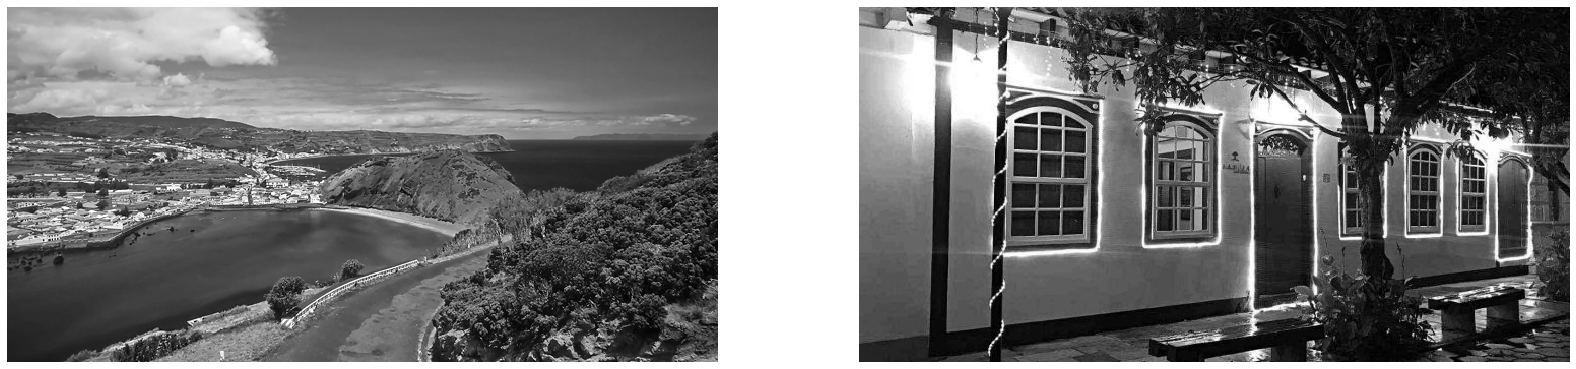

In [3]:
# Original images
S1 = cv2.imread('im1.jpg',0)
S2 = cv2.imread('im2.jpg',0)

showTwoIm(S1, S2)

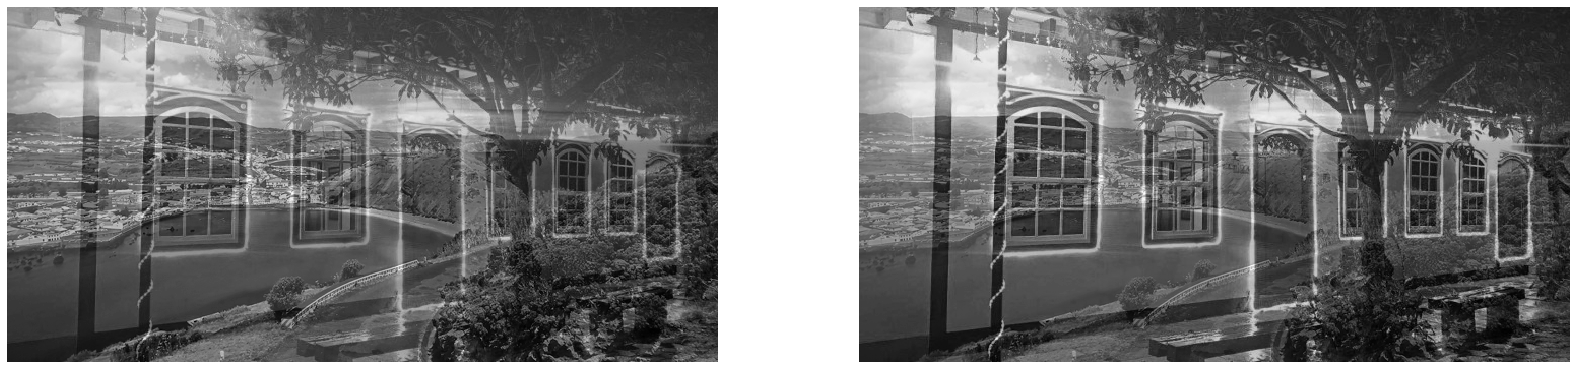

In [4]:
# Mixing them
w = np.array([[0.6, 0.4], [0.4, 0.6]])

X1 = w[0,0]*S1 + w[0,1]*S2
X2 = w[1,0]*S1 + w[1,1]*S2

showTwoIm(X1, X2)

### Step 1 is to find the angle with maximal variance:

In [50]:
# make it a vector and center data around mean

M, N = X1.shape

x1 = X1.reshape(M*N, 1) 
x2 = X2.reshape(M*N, 1)

x1v = x1 - np.mean(x1) 
x2v = x2 - np.mean(x2)

#for T in np.linspace(0,np.pi,62):
theta0 = 0.45*np.arctan( -2*np.sum(x1v*x2v) / np.sum(x1v**2-x2v**2) ); # compute 1st principal direction
print(theta0) # in radians

0.6639565754995501


In [51]:
Us = np.array([[np.cos(theta0), np.sin(theta0)], 
               [-np.sin(theta0), np.cos(theta0)]])



### Step 2 is finding the scaling of the principal components:

In [52]:
sigma1 = np.sum( (x1v*np.cos(theta0) + x2v*np.sin(theta0))**2 )
sigma2 = np.sum( (x1v*np.cos(theta0-np.pi/2) + x2v*np.sin(theta0 - np.pi/2))**2 )

Sigma_inv = np.array([[1/np.sqrt(sigma1), 0], 
                      [0, 1/np.sqrt(sigma2)]])

### Step 3 is the rotation to separability:

In [61]:
X1bar = Sigma_inv[0,0]*(Us[0,0]*X1+Us[0,1]*X2)
X2bar = Sigma_inv[1,1]*(Us[1,0]*X1+Us[1,1]*X2)

x1vbar = X1bar.reshape(M*N, 1)
x2vbar = X2bar.reshape(M*N, 1)

phi0 = 0.82*np.arctan( -np.sum(2*(x1vbar**3)*x2vbar-2*x1vbar*(x2vbar**3)) / 
                    np.sum(3*(x1vbar**2)*(x2vbar**2)-0.5*(x1vbar**4)-0.5*(x2vbar**4)))

V = np.array([[np.cos(phi0), np.sin(phi0)],
              [-np.sin(phi0), np.cos(phi0)]])

m1 = V[0,0]*X1bar+V[0,1]*X2bar
m2 = V[1,0]*X1bar+V[1,1]*X2bar

S1_hat = (m1 - np.min(m1))/(np.max(m1) - np.min(m1))
S2_hat = (m2 - np.min(m2))/(np.max(m2) - np.min(m2))


# Showing results

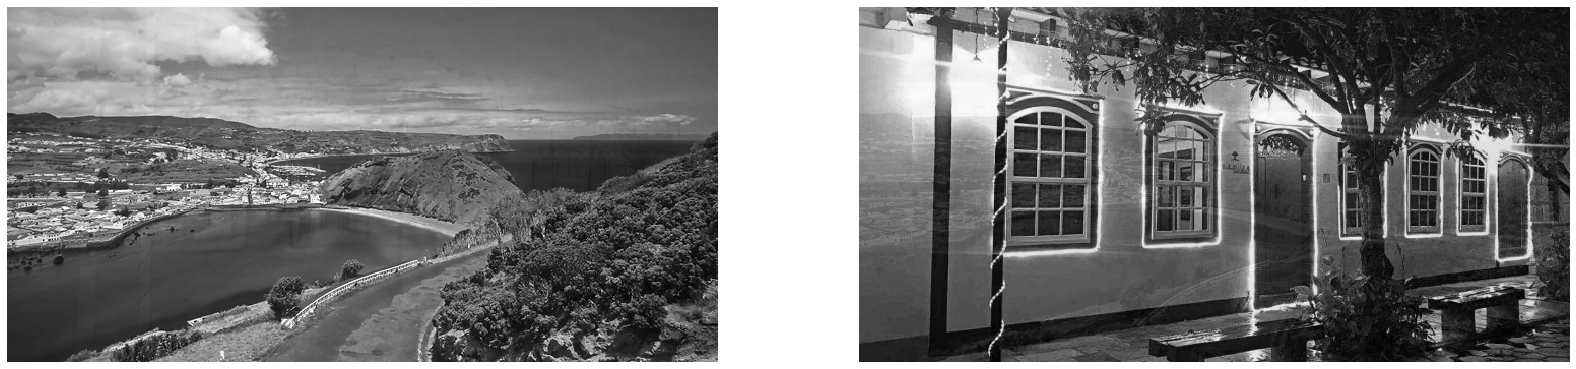

In [62]:
showTwoIm(S1_hat, S2_hat)

# Comparing with original

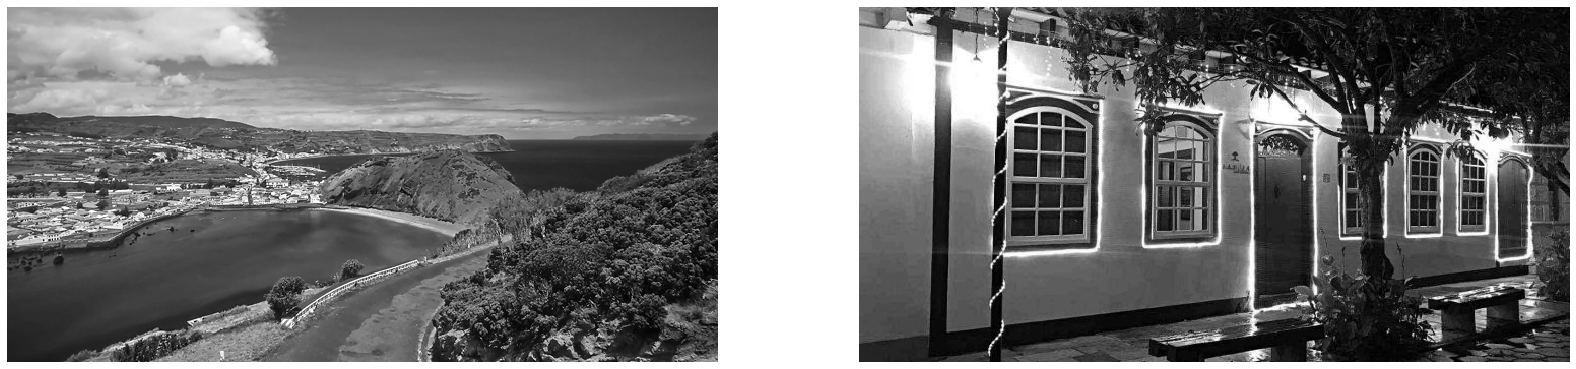

In [14]:
showTwoIm(S1, S2)